# Exploratory Data Analysis (EDA)
Este notebook realiza un análisis exploratorio del dataset proporcionado sobre precios en Mercadona.

In [4]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para gráficos más claros
sns.set(style="whitegrid")

# Cargar el dataset
file_path = "datasets/dataset_unificado_mercadona.csv"
data = pd.read_csv(file_path)

# Mostrar información general del dataset
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761102 entries, 0 to 761101
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               761102 non-null  int64  
 1   supermarket      761102 non-null  object 
 2   category         761102 non-null  object 
 3   name             761102 non-null  object 
 4   price            761102 non-null  float64
 5   reference_price  761102 non-null  float64
 6   reference_unit   761102 non-null  object 
 7   insert_date      761102 non-null  object 
 8   PIBFecha         761102 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 52.3+ MB


,id,supermarket,category,name,price,reference_price,reference_unit,insert_date,PIBFecha
0,248789,mercadona-es,fruta,Banana,0.26,1.29,kg,2020-07-21 16:06:00,287.632
1,248790,mercadona-es,fruta,PlÃ¡tano,0.34,1.99,kg,2020-07-21 16:06:00,287.632
2,248791,mercadona-es,fruta,PlÃ¡tano macho,0.58,1.95,kg,2020-07-21 16:06:00,287.632
3,248792,mercadona-es,fruta,Uva blanca sin semillas,2.84,3.79,kg,2020-07-21 16:06:00,287.632
4,248793,mercadona-es,fruta,Uva negra sin semillas,2.99,3.99,kg,2020-07-21 16:06:00,287.632


## Resumen del Dataset
### Información general y valores faltantes

In [5]:

# Resumen estadístico
data.describe()

# Verificar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
id                 0
supermarket        0
category           0
name               0
price              0
reference_price    0
reference_unit     0
insert_date        0
PIBFecha           0
dtype: int64


## Análisis de Variables Categóricas

In [6]:

# Variables categóricas
categorical_columns = ['supermarket', 'category', 'name', 'reference_unit']
for col in categorical_columns:
    print(f"Columna: {col}")
    print(data[col].value_counts().head(10))  # Mostrar las 10 categorías más frecuentes
    print()


Columna: supermarket
supermarket
mercadona-es    761102
Name: count, dtype: int64

Columna: category
category
perfume_y_colonia            22601
verdura                      19104
leche_y_bebidas_vegetales    17432
coloracion_cabello           15341
cerveza                      12041
chocolate                    11614
licores                      11529
insecticida_y_ambientador    11228
marisco                      10226
cuidado_e_higiene_facial     10152
Name: count, dtype: int64

Columna: name
name
Cerveza ClÃ¡sica Steinburg                            1190
Refresco Coca-Cola Zero Zero                           952
Refresco Coca-Cola                                     833
Cerveza Especial Steinburg                             823
Tomate frito Hacendado                                 717
Refresco cola Hacendado Zero azÃºcar Zero cafeÃ­na     714
Refresco Coca-Cola Zero azÃºcar                        714
Preparado lÃ¡cteo crecimiento +1 aÃ±o Hacendado        708
Cerveza Pils Krombache

## Distribución de Variables Numéricas

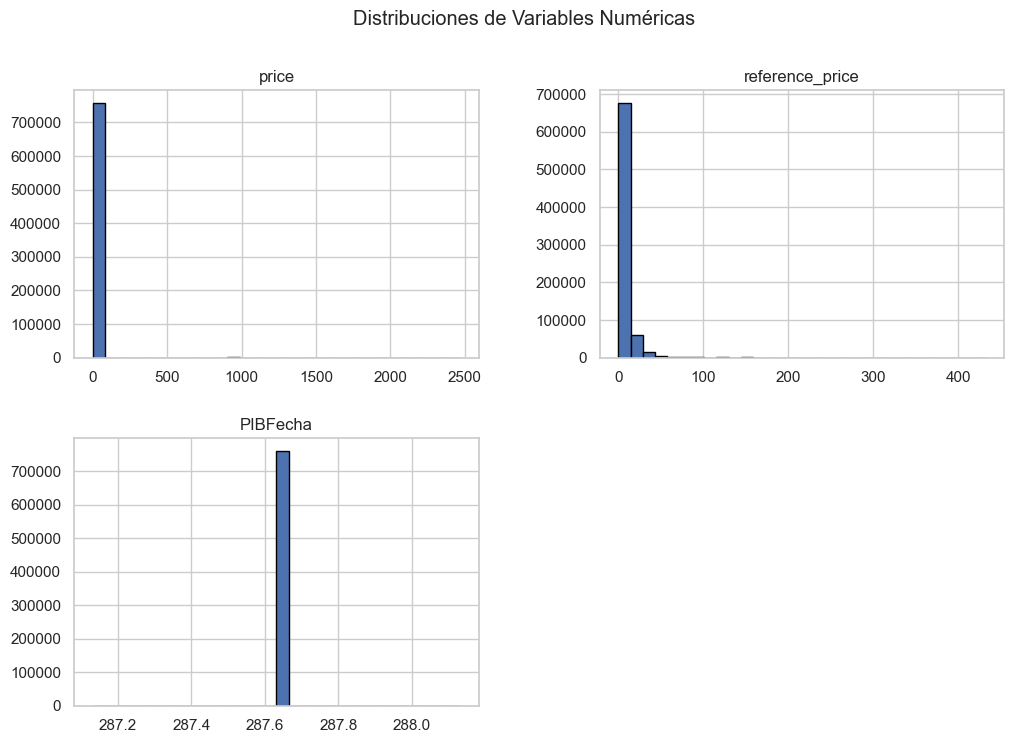

In [17]:

# Histogramas para variables numéricas
numerical_columns = ['price', 'reference_price', 'PIBFecha']
data[numerical_columns].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribuciones de Variables Numéricas")
plt.show()


## Correlaciones entre Variables Numéricas

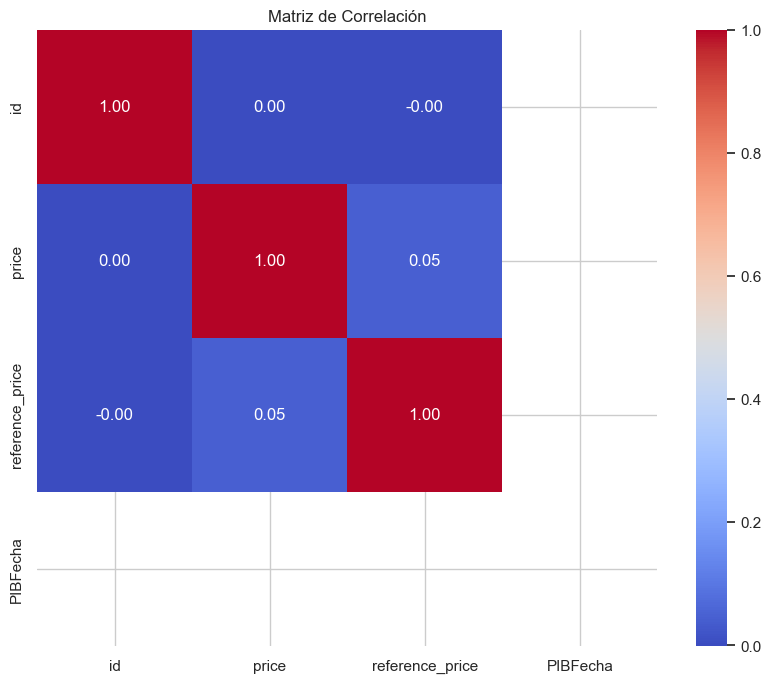

In [24]:
# Seleccionar únicamente las columnas numéricas
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación usando solo las columnas numéricas
correlation_matrix = data[numerical_columns].corr()

# Heatmap de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


## Relación entre Precio y Categoría

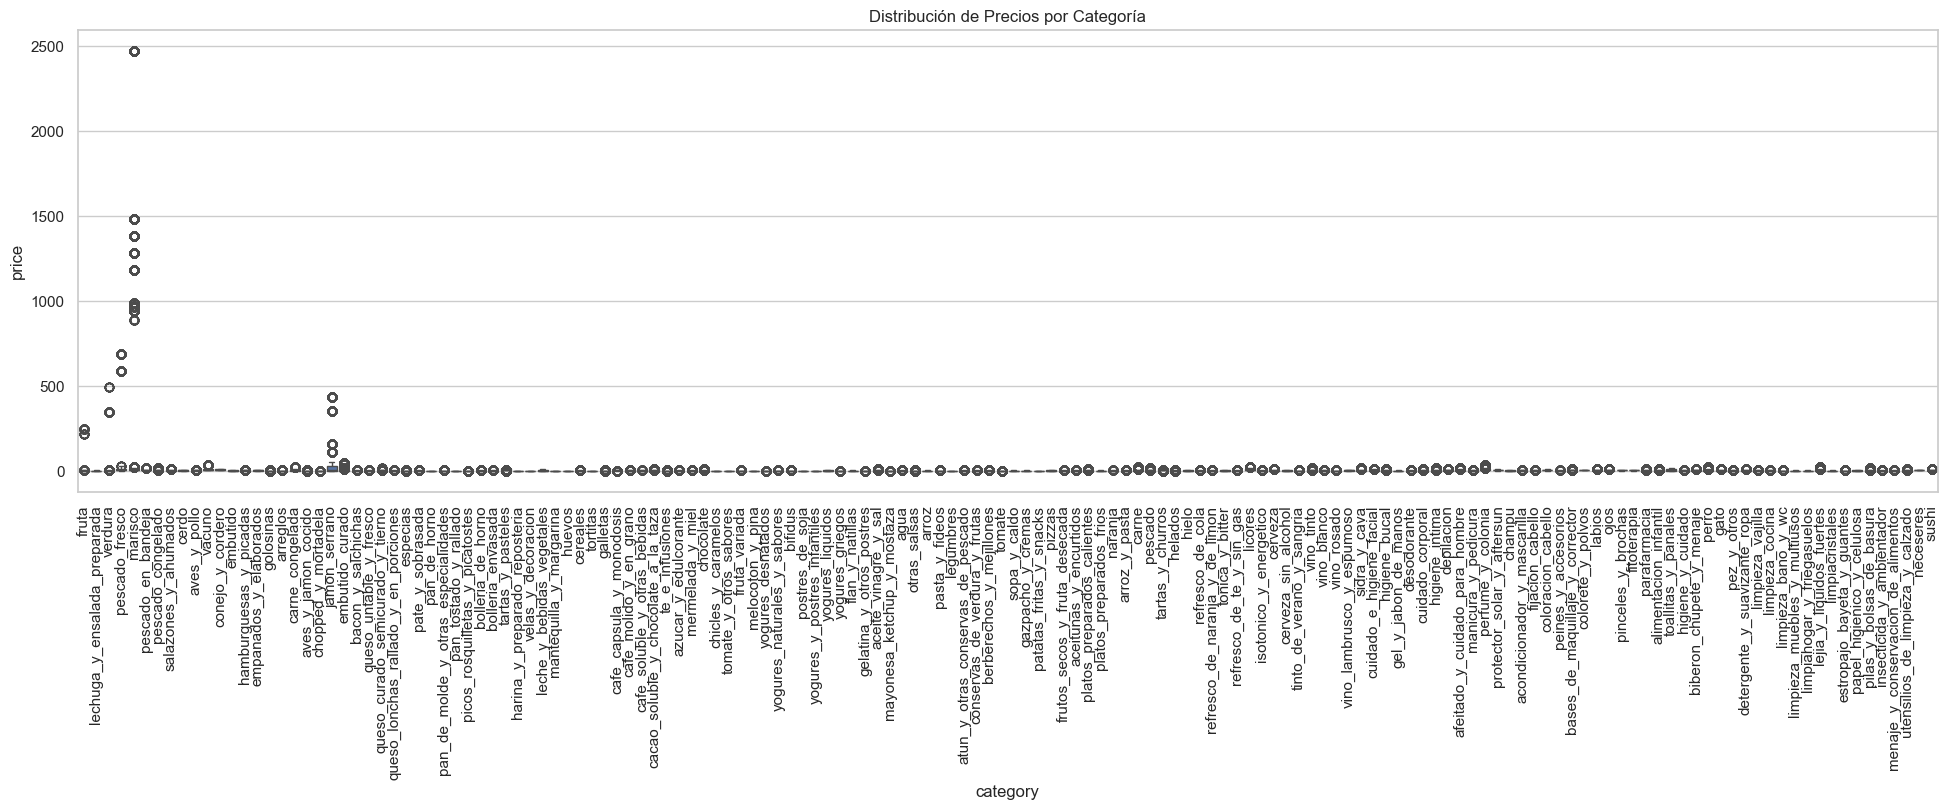

In [25]:

# Boxplot de precios por categoría
plt.figure(figsize=(24, 6))
sns.boxplot(x="category", y="price", data=data)
plt.xticks(rotation=90)
plt.title("Distribución de Precios por Categoría")
plt.show()


/var/folders/8c/b74v7pn510l6yjk498wmjh740000gp/T/ipykernel_97477/3986928450.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


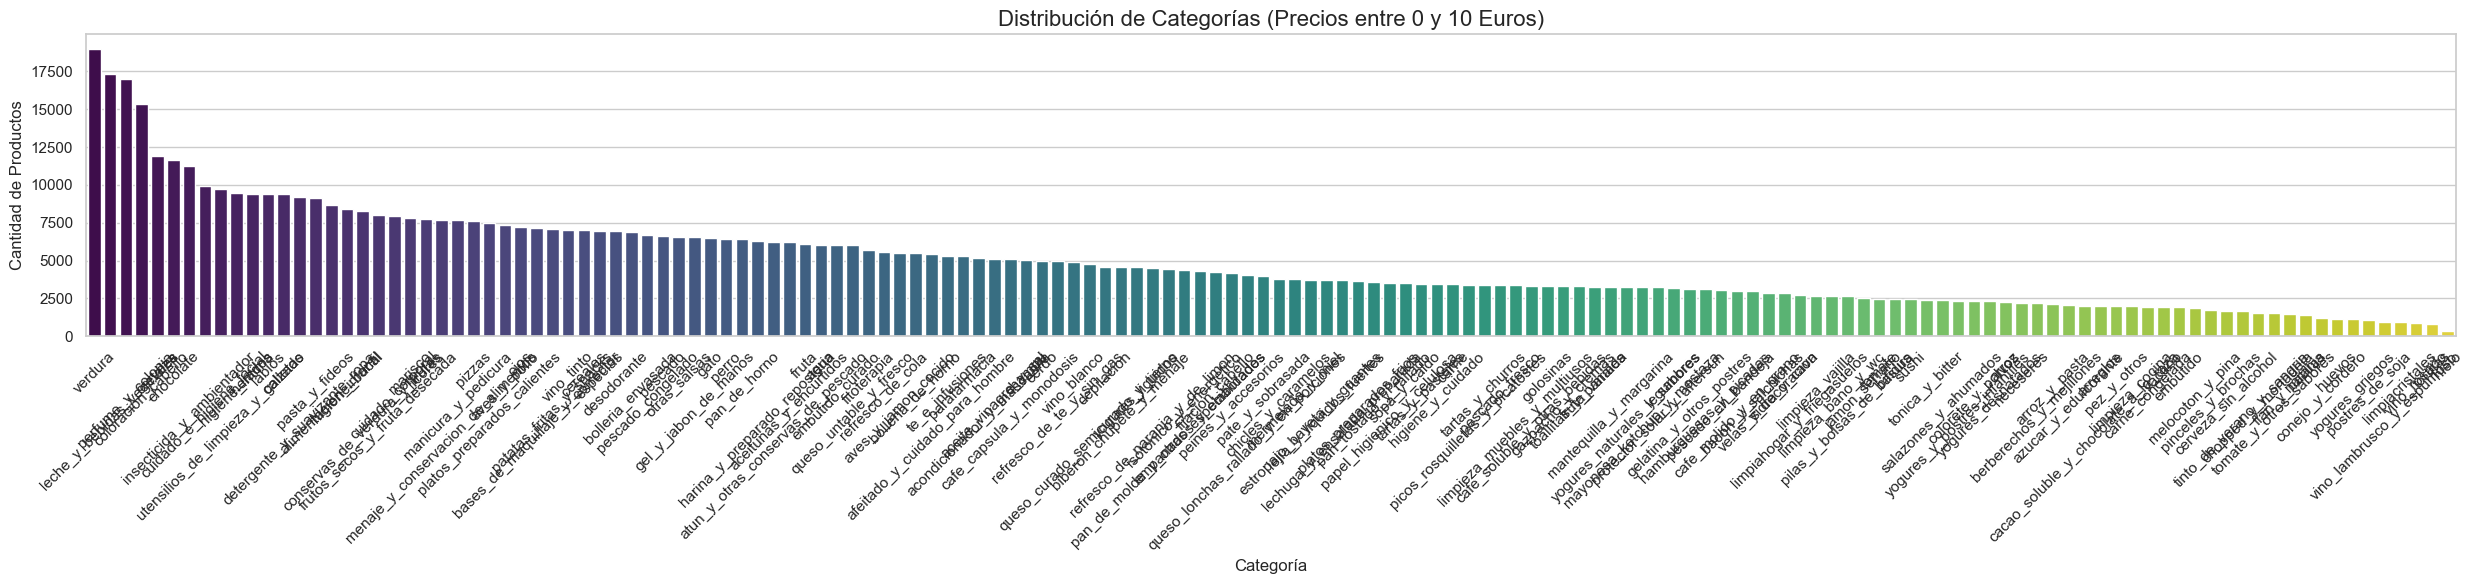

In [27]:
# Filtrar los datos para precios entre 0 y 10 euros
filtered_data = data[(data['price'] >= 0) & (data['price'] <= 10)]

# Contar productos por categoría
category_counts = filtered_data['category'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(25, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribución de Categorías (Precios entre 0 y 10 Euros)", fontsize=16)
plt.xlabel("Categoría", fontsize=12)
plt.ylabel("Cantidad de Productos", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
